In [176]:
from importlib import reload 
import mass_function as mf
import sampler as sm
import mass_profile as mp
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import quad
import astropy.units as u
import scipy
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plotting

In [65]:
ps = mp.PointSource(Ml=1)

In [173]:
import pickle
import plotting as plot

with open('../results/samples_Roman_ps_PBH4-23-24-2.pkl', 'rb') as f:
    data = pickle.load(f)

In [174]:
data.shape

(16000, 1)

In [143]:
data

array([-inf, -inf, -inf, ..., -inf, -inf, -inf])

Text(0.5, 1.0, 'PBH logprob')

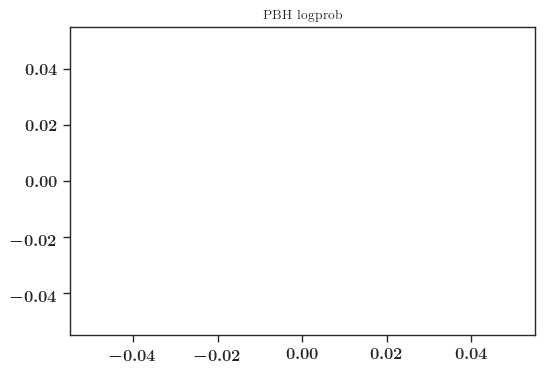

In [142]:
plt.plot(np.abs(data))
plt.title('PBH logprob')

In [13]:
import os
os.getcwd()

'/Users/fangirl/Repos/Kris/dmsl/dmsl'

In [18]:
plot.plot_logprob(data,'../results/log.png')

2024-04-08T14:00:20.662090: made ../results/log.png


In [175]:
plot.plot_emcee(data,nstars=1000,nsamples=2000,ndims=2,massprofile=ps,surveyname='PBH_unpruned5',usefraction='None',massfunction=pbh)

logf_pbh
2024-04-23T00:18:08.471535: made /Users/fangirl/Repos/Kris/dmsl/results/post_PBH_unpruned5_ps_PBH_logf_pbh_frac_3_3_2_2024:04:23-00.18.08.png
2024-04-23T00:18:08.549386: made /Users/fangirl/Repos/Kris/dmsl/results/post_PBH_unpruned5_ps_PBH_c200_3_3_2_2024:04:23-00.18.08.png
2024-04-23T00:18:09.458836: made /Users/fangirl/Repos/Kris/dmsl/results/corner_PBH_unpruned5_ps_PBH_frac_3_3_2_2024:04:23-00.18.08.png


## Testing CDM data for WDM

In [33]:
import pandas as pd

In [162]:
df = pd.read_csv('../data/star_accel/Roman_3_2_0.dat')

In [163]:
df.shape

(1000, 2)

In [165]:
df.to_numpy().shape

(1000, 2)

In [164]:
df.head()

,a_x,a_y
0,0.012573,-0.013210
1,0.064042,0.010490
2,-0.053567,0.036160
3,0.130400,0.094708
4,-0.070374,-0.126542


In [150]:
import accel_data as ad
import survey 
r = survey.Roman()

In [160]:
wdm = ad.AccelData(r, nstars=1000, ndims=2,wdm=True)

In lensing model
<class 'astropy.units.quantity.Quantity'> [[ 5.13412304e-08 -2.44858141e-08]
 [ 5.84686833e-14 -2.16436940e-13]
 [ 1.73258317e-08 -3.08492343e-08]
 ...
 [ 1.45842598e-08 -1.24729469e-09]
 [-8.74433468e-07 -1.45929104e-06]
 [ 6.10772652e-08 -2.02177357e-09]] uas / yr2
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_3_2_0_2024:04:15-15.15.34.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0_2024:04:15-15.15.34.png
(1000, 2)
2024-04-15T15:15:34.152404: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_3_2_0_2024:04:15-15.15.34.png


In [161]:
wdm.data

,a_x,a_y
0,5.134123e-08,-2.448581e-08
1,5.846868e-14,-2.164369e-13
2,1.732583e-08,-3.084923e-08
3,2.732061e-09,4.510467e-09
4,7.910661e-09,-5.998044e-08
...,...,...
995,1.603671e-10,-1.011577e-10
996,9.715455e-07,-7.165435e-07
997,1.458426e-08,-1.247295e-09
998,-8.744335e-07,-1.459291e-06


## WDM 

In [180]:
%%time
wdm_best = mf.WDM_stream(m_l=np.logspace(0, np.log10(10000), 1000),m_wdm=487, gamma=25.2, beta=1.58 ) 

CPU times: user 23.8 ms, sys: 1.15 ms, total: 25 ms
Wall time: 30 ms


In [177]:
%%time
wdm_f = mf.WDM_stream(m_l=np.logspace(0, np.log10(10000), 1000),m_wdm=6.3, gamma=2.7, beta=0.99) 

CPU times: user 21.6 ms, sys: 1.19 ms, total: 22.7 ms
Wall time: 22.1 ms


In [179]:
%%time
wdm_upper = mf.WDM_stream(m_l=np.logspace(0, np.log10(10000), 1000), m_wdm=1000, gamma=50, beta=3)

CPU times: user 24.6 ms, sys: 828 µs, total: 25.4 ms
Wall time: 24.6 ms


In [178]:
%%time
wdm_lower = mf.WDM_stream(m_l=np.logspace(0, np.log10(10000), 1000), m_wdm=0.01, gamma=0.01, beta=0)

CPU times: user 20.9 ms, sys: 700 µs, total: 21.6 ms
Wall time: 21.7 ms


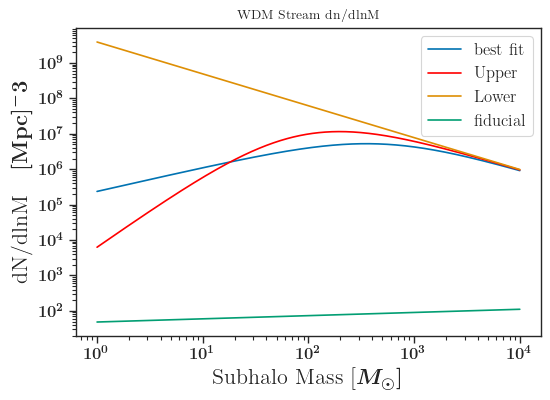

In [196]:
plt.title('WDM Stream dn/dlnM')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dlnM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(wdm_best.m_l,wdm_best.m_l*wdm_best.den_n_l, label='best fit')
plt.plot(wdm_upper.m_l,wdm_upper.m_l*wdm_upper.den_n_l,'r', label='Upper')
plt.plot(wdm_lower.m_l,wdm_lower.m_l*wdm_lower.den_n_l, label='Lower')
plt.plot(wdm_f.m_l,wdm_f.m_l*wdm_f.den_n_l, label='fiducial')
plt.legend()
plt.show()

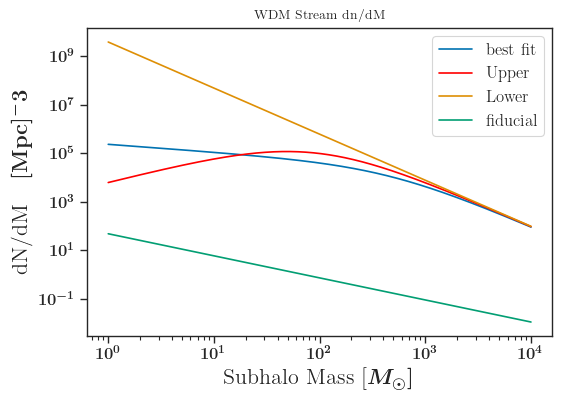

In [195]:
plt.title('WDM Stream dn/dM')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(wdm_best.m_l,wdm_best.den_n_l, label='best fit')
plt.plot(wdm_upper.m_l,wdm_upper.den_n_l,'r', label='Upper')
plt.plot(wdm_lower.m_l,wdm_lower.den_n_l, label='Lower')
plt.plot(wdm_f.m_l,wdm_f.den_n_l, label='fiducial')
plt.legend()
plt.show()

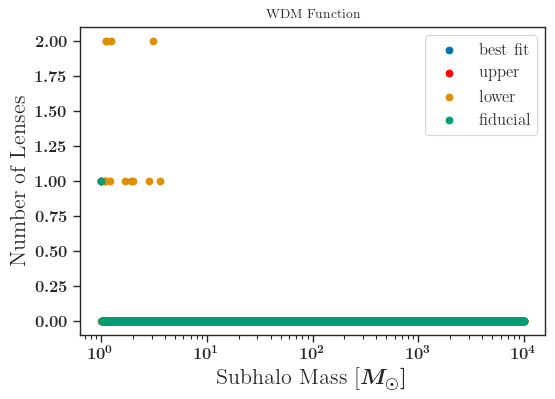

In [206]:
plt.title('WDM Function')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Number of Lenses')
plt.scatter(wdm_best.m_l,wdm_best.n_l, label='best fit')
plt.scatter(wdm_upper.m_l,wdm_upper.n_l,color='r', label='upper')
plt.scatter(wdm_lower.m_l,wdm_lower.n_l, label='lower')
plt.scatter(wdm_f.m_l,wdm_f.n_l, label='fiducial')
plt.legend()
plt.show()

## WDM with CDM tuning

In [49]:
%%time
wdm_cdm = mf.WDM_stream(m_l=np.logspace(0, np.log10(10000), 1000),m_wdm=125.44,gamma=11.61,beta=3.03,loga_cdm=-2.83, b_cdm=-2.06, logc_cdm=7.05 ) 

CPU times: user 719 µs, sys: 220 µs, total: 939 µs
Wall time: 759 µs


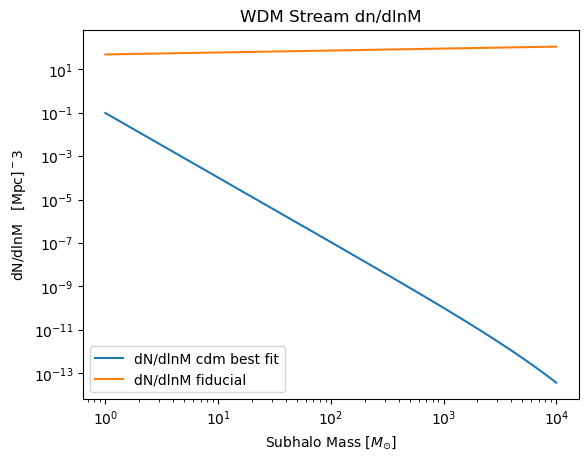

In [51]:
plt.title('WDM Stream dn/dlnM')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dlnM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(wdm_cdm.m_l,wdm_cdm.m_l*wdm_cdm.den_n_l, label='dN/dlnM cdm best fit')
plt.plot(wdm_f.m_l,wdm_f.m_l*wdm_f.den_n_l, label='dN/dlnM fiducial')
plt.legend()
plt.show()

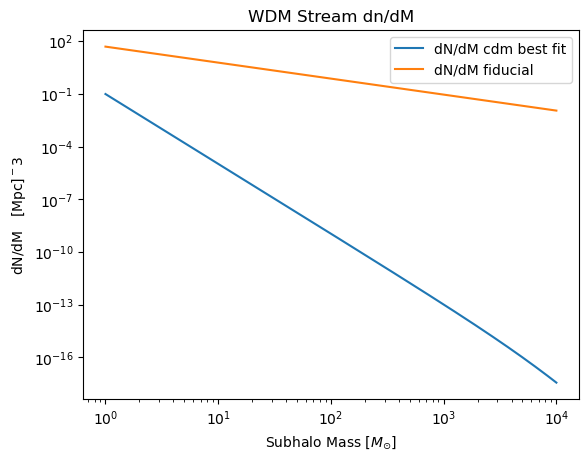

In [52]:
plt.title('WDM Stream dn/dM')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(wdm_cdm.m_l,wdm_cdm.den_n_l, label='dN/dM cdm best fit')
plt.plot(wdm_f.m_l,wdm_f.den_n_l, label='dN/dM fiducial')
plt.legend()
plt.show()

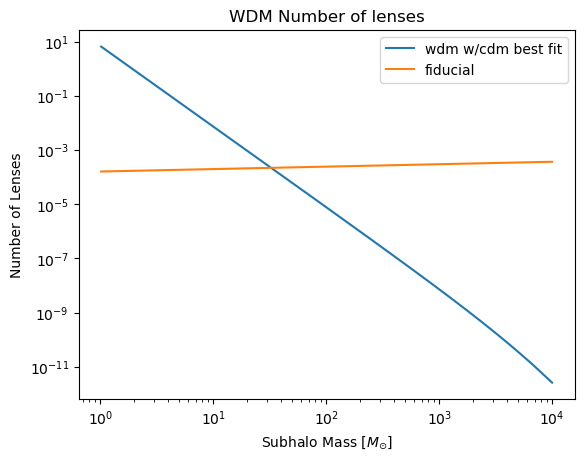

In [50]:
plt.title('WDM Number of lenses')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Number of Lenses')
plt.plot(wdm_cdm.m_l[2:],wdm_cdm.n_l[2:], label='wdm w/cdm best fit')
plt.plot(wdm_f.m_l[2:],wdm_f.n_l[2:], label='fiducial')
plt.legend()
plt.show()

## CDM

In [172]:
cdm = mf.CDM(m_l = np.logspace(5, 9, 100),loga=-3.38, b= -3.89, logc=7.74 )
#Best Vals: log a=-3.38, b= -3.89, logc=7.74

Total lenses:  11.706855366909606 [0.00000000e+00 0.00000000e+00 1.20037570e+11 9.17380531e+10
 7.01103028e+10 5.35814134e+10 4.09493006e+10 3.12952779e+10
 2.39172441e+10 1.82786223e+10 1.39693366e+10 1.06759887e+10
 8.15906566e+09 6.23552108e+09 4.76546270e+09 3.64197867e+09
 2.78336218e+09 2.12716924e+09 1.62567740e+09 1.24241501e+09
 9.49508844e+08 7.25656914e+08 5.54579307e+08 4.23834186e+08
 3.23912947e+08 2.47548689e+08 1.89187724e+08 1.44585678e+08
 1.10498810e+08 8.44481079e+07 6.45390022e+07 4.93235776e+07
 3.76952730e+07 2.88084052e+07 2.20166653e+07 1.68261154e+07
 1.28592662e+07 9.82762348e+06 7.51070721e+06 5.74001670e+06
 4.38677620e+06 3.35256960e+06 2.56218288e+06 1.95813418e+06
 1.49649328e+06 1.14368676e+06 8.74056322e+05 6.67992739e+05
 5.10509778e+05 3.90154291e+05 2.98173272e+05 2.27877284e+05
 1.74153961e+05 1.33096208e+05 1.01718045e+05 7.77374565e+04
 5.94104238e+04 4.54040898e+04 3.46998260e+04 2.65191512e+04
 2.02671156e+04 1.54890316e+04 1.18374072e+04 9.046

In [113]:
cdm.n_l

<Quantity [0.00000000e+00, 0.00000000e+00, 4.92521646e-04, 3.76406960e-04,
           2.87666950e-04, 2.19847885e-04, 1.68017537e-04, 1.28406479e-04,
           9.81339458e-05, 7.49983286e-05, 5.73170603e-05, 4.38042482e-05,
           3.34771559e-05, 2.55847323e-05, 1.95529910e-05, 1.49432659e-05,
           1.14203088e-05, 8.72790822e-06, 6.67025587e-06, 5.09770638e-06,
           3.89589407e-06, 2.97741563e-06, 2.27547352e-06, 1.73901813e-06,
           1.32903505e-06, 1.01570773e-06, 7.76249046e-07, 5.93244066e-07,
           4.53383516e-07, 3.46495860e-07, 2.64807556e-07, 2.02377719e-07,
           1.54666059e-07, 1.18202685e-07, 9.03357523e-08, 6.90386020e-08,
           5.27623721e-08, 4.03233528e-08, 3.08169007e-08, 2.35516469e-08,
           1.79992167e-08, 1.37558024e-08, 1.05127963e-08, 8.03434681e-09,
           6.14020538e-09, 4.69261820e-09, 3.58630766e-09, 2.74081592e-09,
           2.09465350e-09, 1.60082742e-09, 1.22342355e-09, 9.34994725e-10,
           7.14564578e-10

In [173]:
cdm_upper = mf.CDM(m_l = np.logspace(5, 9, 100),loga=2, b= -0.01, logc=12 )
#Vals: log a=1, b= -0.01, logc=10

Total lenses:  11.034315751911132 [0.00000000e+00 0.00000000e+00 1.25544342e+06 1.37656633e+06
 1.50937497e+06 1.65499674e+06 1.81466784e+06 1.98974372e+06
 2.18171061e+06 2.39219811e+06 2.62299307e+06 2.87605471e+06
 3.15353128e+06 3.45777829e+06 3.79137851e+06 4.15716386e+06
 4.55823954e+06 4.99801026e+06 5.48020928e+06 6.00892998e+06
 6.58866071e+06 7.22432281e+06 7.92131244e+06 8.68554638e+06
 9.52351222e+06 1.04423235e+07 1.14497800e+07 1.25544342e+07
 1.37656633e+07 1.50937497e+07 1.65499674e+07 1.81466784e+07
 1.98974372e+07 2.18171061e+07 2.39219811e+07 2.62299307e+07
 2.87605471e+07 3.15353128e+07 3.45777829e+07 3.79137851e+07
 4.15716386e+07 4.55823954e+07 4.99801026e+07 5.48020928e+07
 6.00892998e+07 6.58866071e+07 7.22432281e+07 7.92131244e+07
 8.68554638e+07 9.52351222e+07 1.04423235e+08 1.14497800e+08
 1.25544342e+08 1.37656633e+08 1.50937497e+08 1.65499674e+08
 1.81466784e+08 1.98974372e+08 2.18171061e+08 2.39219811e+08
 2.62299307e+08 2.87605471e+08 3.15353128e+08 3.457

In [174]:
cdm_lower = mf.CDM(m_l = np.logspace(5, 9, 100), loga=-9, b= -10, logc=1)
#Vals: log a=-9, b= -7, logc=3

Total lenses:  -45.284951378988474 [0.00000000e+00 0.00000000e+00 2.94256828e-46 1.27376756e-46
 5.51383571e-47 2.38680786e-47 1.03319214e-47 4.47244214e-48
 1.93601344e-48 8.38054001e-49 3.62773571e-49 1.57036019e-49
 6.79771438e-50 2.94256828e-50 1.27376756e-50 5.51383571e-51
 2.38680786e-51 1.03319214e-51 4.47244214e-52 1.93601344e-52
 8.38054001e-53 3.62773571e-53 1.57036019e-53 6.79771432e-54
 2.94256833e-54 1.27376753e-54 5.51383579e-55 2.38680795e-55
 1.03319167e-55 4.47243441e-56 1.93601117e-56 8.38053467e-57
 3.62770676e-57 1.57037791e-57 6.79708844e-58 2.94193047e-58
 1.27416238e-58 5.50736852e-59 2.38030334e-59 1.02679752e-59
 4.51168608e-60 1.86690458e-60 7.77876910e-61 3.11150764e-61
 1.55575382e-61 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00

In [175]:
cdm_f = mf.CDM(m_l = np.logspace(5, 9, 100), loga=-4.49, b=-1.9, logc= 7.41)
#Vals: loga=-4.49, b=-1.9, logc= 7.41

Total lenses:  5.099998992624154 [0.00000000e+00 0.00000000e+00 1.01145289e+04 9.30212183e+03
 8.55496795e+03 7.86782607e+03 7.23587597e+03 6.65468461e+03
 6.12017501e+03 5.62859765e+03 5.17650418e+03 4.76072321e+03
 4.37833811e+03 4.02666648e+03 3.70324140e+03 3.40579408e+03
 3.13223797e+03 2.88065411e+03 2.64927766e+03 2.43648556e+03
 2.24078508e+03 2.06080343e+03 1.89527805e+03 1.74304780e+03
 1.60304480e+03 1.47428696e+03 1.35587105e+03 1.24696640e+03
 1.14680906e+03 1.05469643e+03 9.69982371e+02 8.92072610e+02
 8.20420623e+02 7.54523781e+02 6.93919826e+02 6.38183629e+02
 5.86924209e+02 5.39781986e+02 4.96426264e+02 4.56552909e+02
 4.19882213e+02 3.86156937e+02 3.55140503e+02 3.26615333e+02
 3.00381328e+02 2.76254459e+02 2.54065479e+02 2.33658736e+02
 2.14891079e+02 1.97630855e+02 1.81756987e+02 1.67158120e+02
 1.53731846e+02 1.41383981e+02 1.30027906e+02 1.19583960e+02
 1.09978881e+02 1.01145289e+02 9.30212183e+01 8.55496795e+01
 7.86782607e+01 7.23587597e+01 6.65468461e+01 6.1201

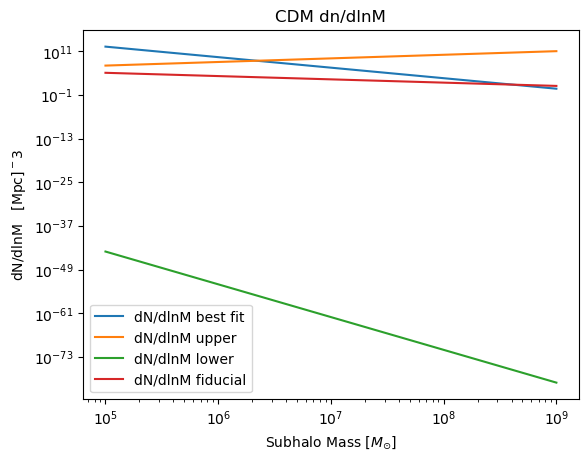

In [182]:
plt.title('CDM dn/dlnM')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dlnM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(cdm.m_l,cdm.m_l*cdm.den_n_l, label='dN/dlnM best fit')
plt.plot(cdm_upper.m_l,cdm_upper.m_l*cdm_upper.den_n_l, label='dN/dlnM upper')
plt.plot(cdm_lower.m_l,cdm_lower.m_l*cdm_lower.den_n_l, label='dN/dlnM lower')
plt.plot(cdm_f.m_l,cdm_f.m_l*cdm_f.den_n_l, label='dN/dlnM fiducial')
plt.legend()
plt.show()

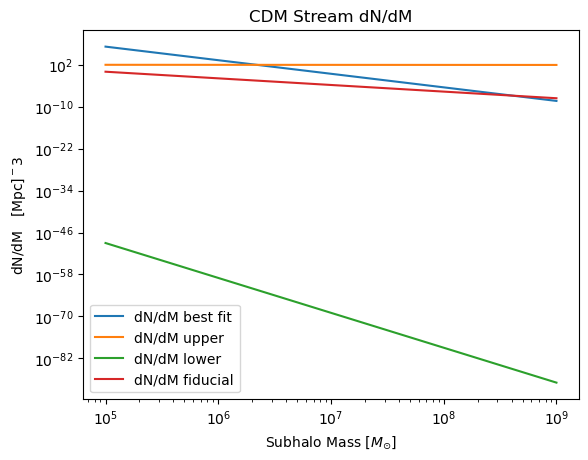

In [177]:
plt.title('CDM Stream dN/dM')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(cdm.m_l,cdm.den_n_l, label='dN/dM best fit')
plt.plot(cdm_upper.m_l,cdm_upper.den_n_l, label='dN/dM upper')
plt.plot(cdm_lower.m_l,cdm_lower.den_n_l, label='dN/dM lower')
plt.plot(cdm_f.m_l,cdm_f.den_n_l, label='dN/dM fiducial')
plt.legend()
plt.show()

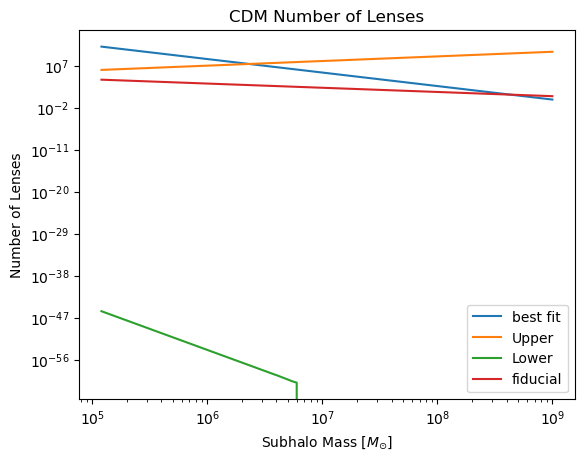

In [178]:
plt.title('CDM Number of Lenses')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Number of Lenses')
plt.plot(cdm.m_l[2:],cdm.n_l[2:], label='best fit')
plt.plot(cdm_upper.m_l[2:],cdm_upper.n_l[2:], label='Upper')
plt.plot(cdm_lower.m_l[2:],cdm_lower.n_l[2:], label='Lower')
plt.plot(cdm_f.m_l[2:],cdm_f.n_l[2:], label='fiducial')
plt.legend()
plt.show()

## PBH

In [135]:
pbh = mf.PBH(m_l = np.logspace(-8, 3, 10))

[1 0 0 0 0 0 0 0 0 0]


In [136]:
pbh.n_l

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [137]:
pbh.m_l

array([1.00000000e-08, 1.66810054e-07, 2.78255940e-06, 4.64158883e-05,
       7.74263683e-04, 1.29154967e-02, 2.15443469e-01, 3.59381366e+00,
       5.99484250e+01, 1.00000000e+03])

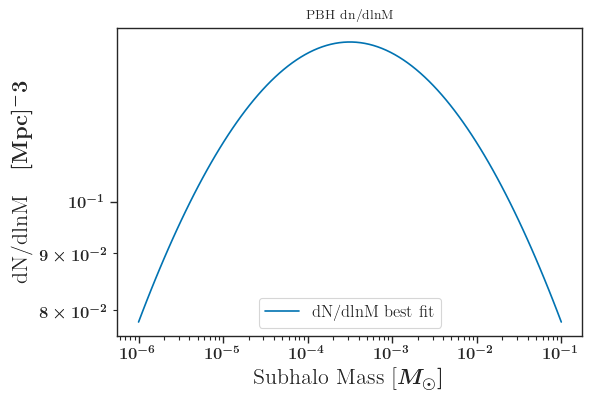

In [41]:
plt.title('PBH dn/dlnM')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dlnM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(pbh.m_l,pbh.m_l*pbh.den_n_l, label='dN/dlnM best fit')
#plt.plot(cdm_upper.m_l,cdm_upper.m_l*cdm_upper.den_n_l, label='dN/dlnM upper')
#plt.plot(cdm_lower.m_l,cdm_lower.m_l*cdm_lower.den_n_l, label='dN/dlnM lower')
#plt.plot(cdm_f.m_l,cdm_f.m_l*cdm_f.den_n_l, label='dN/dlnM fiducial')
plt.legend()
plt.show()

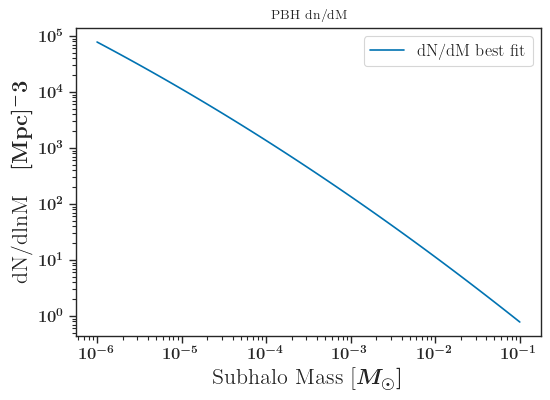

In [42]:
plt.title('PBH dn/dM')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'dN/dlnM $\,\,\,\, [\mathrm{Mpc}]^-3$')
plt.plot(pbh.m_l,pbh.den_n_l, label='dN/dM best fit')
#plt.plot(cdm_upper.m_l,cdm_upper.m_l*cdm_upper.den_n_l, label='dN/dlnM upper')
#plt.plot(cdm_lower.m_l,cdm_lower.m_l*cdm_lower.den_n_l, label='dN/dlnM lower')
#plt.plot(cdm_f.m_l,cdm_f.m_l*cdm_f.den_n_l, label='dN/dlnM fiducial')
plt.legend()
plt.show()

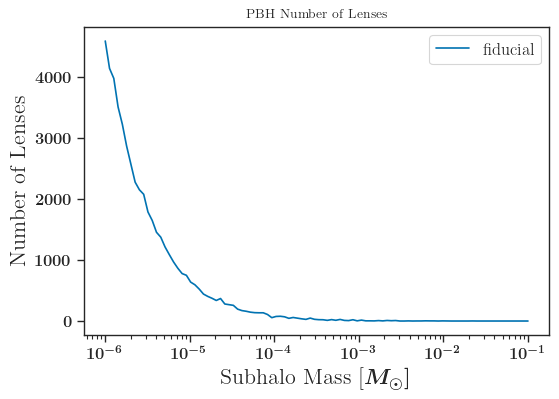

In [43]:
plt.title('PBH Number of Lenses')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.xscale('log')
#plt.yscale('log')
plt.ylabel('Number of Lenses')
plt.plot(pbh.m_l,pbh.n_l, label='fiducial')
plt.legend()
plt.show()

## Number of lenses

In [16]:
%%time
cdm = mf.CDM(m_l = np.logspace(5, 9, 10))

[278255.94022071 278255.94022071 100000.         ... 100000.
 100000.         100000.        ] (83250,)
nl= [71393, 10233, 1400, 194, 24, 4, 2, 0, 0, 0]
l= [2.13841000e+00 3.06505533e-01 4.19337189e-02 5.81081534e-03
 7.18863753e-04 1.19810625e-04 5.99053127e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
final nl= [4 0 0 1 0 0 0 0 0 0]
CPU times: user 10.2 ms, sys: 603 µs, total: 10.8 ms
Wall time: 10.2 ms


In [8]:
%%time
# Method 1 -- integrate dn/dm, poisson sample, normalize and take int value of final
cdm = mf.CDM_Old(m_l = np.logspace(5, 9, 10))

CPU times: user 685 µs, sys: 29 µs, total: 714 µs
Wall time: 697 µs


In [5]:
%%time
# Method 2 -- integrate dn/dm, random sample with dn/dm as prob, assign hist to n_l, norm and then poisson sample
cdm = mf.CDM(m_l = np.logspace(5, 9, 10))

ran_samp (83250,)
nl= [71234, 10240, 1503, 229, 37, 7, 0, 0, 0, 0]
l [2.18980173e-03 3.14787457e-04 4.62036668e-05 7.03968043e-06
 1.13741562e-06 2.15186738e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
final nl= [1 0 0 0 0 0 0 0 0 0]
CPU times: user 10.7 ms, sys: 894 µs, total: 11.6 ms
Wall time: 11 ms


In [107]:
%%time
# Method 3 -- integrate dn/dm, normalize, random sample, poisson sample
cdm = mf.CDM_Test(m_l = np.logspace(0, 6, 10))

CPU times: user 911 µs, sys: 58 µs, total: 969 µs
Wall time: 945 µs


In [14]:
%%time
cdm_old = mf.CDM_Old(m_l = np.logspace(5, 9, 100))

CPU times: user 2.13 ms, sys: 57 µs, total: 2.19 ms
Wall time: 2.17 ms


In [108]:
cdm.n_l

array([5, 0, 0, 0, 0, 0, 0, 0, 0, 0])

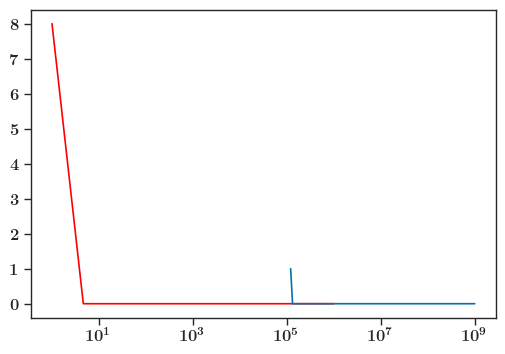

In [105]:
plt.plot(cdm.m_l,cdm.n_l,'r')
plt.plot(cdm_old.m_l[2:],cdm_old.n_l[2:])
plt.xscale('log')
#plt.yscale('log')

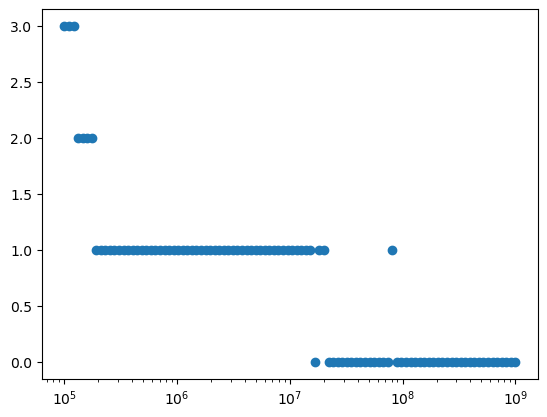

In [16]:
plt.scatter(cdm.m_l, cdm.n_l)
plt.xscale('log')

In [4]:
%%time
n = np.random.choice(cdm_old.m_l,np.int64(126791.32110947138),p=cdm_old.den_n_l/sum(cdm_old.den_n_l))
#np.shape(n)

CPU times: user 7.27 ms, sys: 1.61 ms, total: 8.87 ms
Wall time: 7.9 ms


In [17]:
%%time
n = np.random.default_rng.choice(cdm_old.m_l,np.int64(126791.32110947138),p=cdm_old.den_n_l/sum(cdm_old.den_n_l))
#np.shape(n)

AttributeError: 'builtin_function_or_method' object has no attribute 'choice'

In [10]:
%%time
hist_np, _ = np.histogram(n, bins=cdm_old.m_l)

CPU times: user 4.5 ms, sys: 967 µs, total: 5.47 ms
Wall time: 4.61 ms


In [7]:
%%time
hist = np.bincount(n.astype(int))

CPU times: user 441 µs, sys: 720 µs, total: 1.16 ms
Wall time: 705 µs


CPU times: user 28.7 ms, sys: 1.23 ms, total: 29.9 ms
Wall time: 29 ms


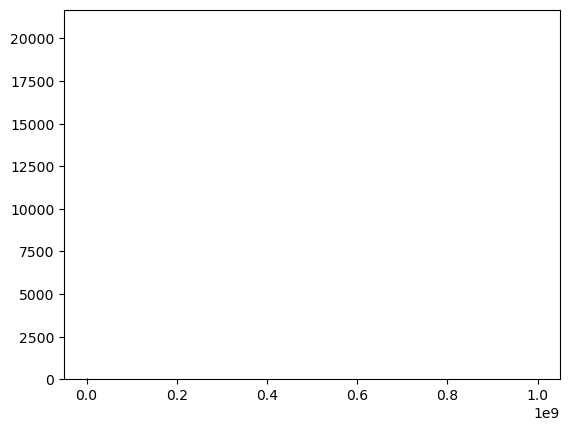

In [11]:
%%time
hist_val, _, _ = plt.hist(n,bins=cdm_old.m_l)

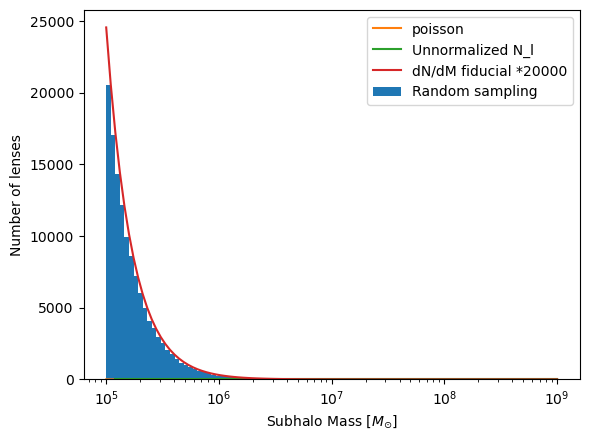

In [382]:
#bins = 10**(np.linspace(5,9,100))
hist_val, __, __= plt.hist(n, bins=cdm.m_l,label='Random sampling')
plt.plot(bins,poisson, label='poisson')
plt.plot(cdm.m_l[2:],cdm.n_l[2:],label='Unnormalized N_l')
plt.plot(cdm_f.m_l,cdm_f.den_n_l*20000, label='dN/dM fiducial *20000')
plt.xlabel(r'Subhalo Mass [$M_{\odot}]$')
plt.ylabel('Number of lenses')
plt.xscale('log')
plt.legend()

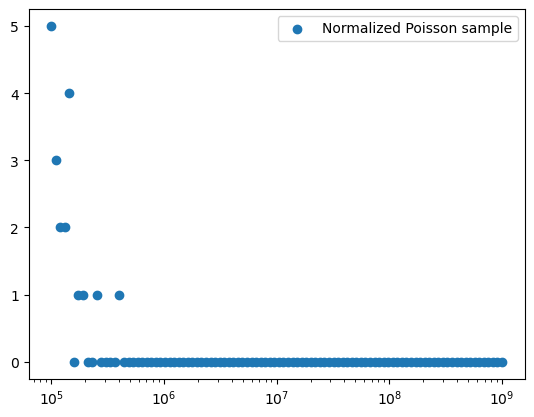

In [381]:
plt.scatter(bins, poisson, label='Normalized Poisson sample')
plt.xscale('log')
plt.legend()

In [48]:
hist_val= np.append(hist_val, 0)

In [360]:
l = np.sum(hist_val*cdm.m_l)

In [375]:
norm = 367.92016406427797/l * 10**4

In [376]:
norm

0.00014418839470892346

In [19]:
from collections import Counter

In [34]:
%%time
hist_c = Counter(n)

CPU times: user 13.9 ms, sys: 29 µs, total: 14 ms
Wall time: 14 ms


In [28]:
hist_c.get(367837.97718286345)

1690

In [50]:
nl = [hist_c[m_l] for m_l in cdm.m_l]

In [51]:
np.allclose(nl,hist_val)

True

In [12]:
hist_val

array([2.0662e+04, 1.7007e+04, 1.4419e+04, 1.2239e+04, 1.0096e+04,
       8.3730e+03, 7.1590e+03, 5.9980e+03, 5.0180e+03, 4.2520e+03,
       3.6500e+03, 2.8730e+03, 2.4370e+03, 1.9230e+03, 1.6900e+03,
       1.4040e+03, 1.2880e+03, 1.0590e+03, 8.4100e+02, 7.3100e+02,
       6.0400e+02, 4.8600e+02, 4.0500e+02, 3.5800e+02, 2.9300e+02,
       2.2600e+02, 1.8900e+02, 1.7900e+02, 1.4500e+02, 1.1800e+02,
       1.2900e+02, 1.0000e+02, 7.2000e+01, 5.9000e+01, 6.3000e+01,
       4.0000e+01, 3.0000e+01, 2.8000e+01, 1.3000e+01, 2.0000e+01,
       1.8000e+01, 6.0000e+00, 9.0000e+00, 1.5000e+01, 1.3000e+01,
       9.0000e+00, 8.0000e+00, 7.0000e+00, 5.0000e+00, 3.0000e+00,
       3.0000e+00, 3.0000e+00, 1.0000e+00, 3.0000e+00, 3.0000e+00,
       2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [13]:
hist_np

array([20662, 17007, 14419, 12239, 10096,  8373,  7159,  5998,  5018,
        4252,  3650,  2873,  2437,  1923,  1690,  1404,  1288,  1059,
         841,   731,   604,   486,   405,   358,   293,   226,   189,
         179,   145,   118,   129,   100,    72,    59,    63,    40,
          30,    28,    13,    20,    18,     6,     9,    15,    13,
           9,     8,     7,     5,     3,     3,     3,     1,     3,
           3,     2,     0,     1,     0,     1,     2,     0,     0,
           1,     0,     0,     1,     0,     0,     0,     0,     1,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0])

In [14]:
hist

array([0, 0, 0, ..., 0, 0, 1])

In [392]:
np.allclose(hist_np, hist_val)

True

In [418]:
norm*hist_val

array([2.96638784e+00, 2.53065052e+00, 2.06059635e+00, 1.75722397e+00,
       1.43755830e+00, 1.20281959e+00, 1.03584943e+00, 8.55037181e-01,
       7.20941974e-01, 5.85549071e-01, 5.17636337e-01, 4.32997749e-01,
       3.57154654e-01, 3.04093324e-01, 2.54348328e-01, 1.99845115e-01,
       1.73747016e-01, 1.50388496e-01, 1.12611136e-01, 1.01941195e-01,
       8.37734573e-02, 7.02197482e-02, 6.31545169e-02, 4.84473006e-02,
       4.08053157e-02, 3.61912871e-02, 2.99911861e-02, 2.29259548e-02,
       1.90328681e-02, 1.67258538e-02, 1.41304627e-02, 1.36978975e-02,
       1.11025064e-02, 8.50711529e-03, 8.79549208e-03, 5.47915900e-03,
       4.90240542e-03, 3.46052147e-03, 4.32565184e-03, 2.45120271e-03,
       2.45120271e-03, 2.16282592e-03, 2.01863753e-03, 2.01863753e-03,
       5.76753579e-04, 8.65130368e-04, 4.32565184e-04, 1.44188395e-03,
       8.65130368e-04, 5.76753579e-04, 4.32565184e-04, 4.32565184e-04,
       4.32565184e-04, 1.44188395e-04, 1.44188395e-04, 1.44188395e-04,
      

In [312]:
np.shape(hist_val)

(100,)

In [424]:
(norm*hist_val).astype(int)

array([2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [427]:
%%time
poisson= np.random.poisson(norm* hist_val)
poisson

CPU times: user 159 µs, sys: 13 µs, total: 172 µs
Wall time: 164 µs


array([4, 5, 1, 4, 1, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [423]:
%%time
gen_poisson= np.random.Generator.poisson(hist_val)
poisson

TypeError: descriptor 'poisson' for 'numpy.random._generator.Generator' objects doesn't apply to a 'numpy.ndarray' object

In [321]:
hist_val*1.8827212866492957e-09

array([3.87897067e-05, 3.30210486e-05, 2.68137166e-05, 2.28618846e-05,
       1.90230159e-05, 1.59334702e-05, 1.34143892e-05, 1.11005247e-05,
       9.23098247e-06, 7.58736679e-06, 6.52551198e-06, 5.59356494e-06,
       4.67479695e-06, 3.92170844e-06, 3.26087327e-06, 2.76760029e-06,
       2.27432731e-06, 1.94861653e-06, 1.50241159e-06, 1.37438654e-06,
       1.13151549e-06, 9.26298873e-07, 8.02039268e-07, 6.77779663e-07,
       5.70464550e-07, 4.95155698e-07, 4.01019634e-07, 3.08766291e-07,
       3.10649012e-07, 2.39105603e-07, 1.93920293e-07, 1.33673211e-07,
       1.60031309e-07, 1.24259605e-07, 9.97842282e-08, 7.90742940e-08,
       7.71915728e-08, 5.64816386e-08, 5.08334747e-08, 4.14198683e-08,
       3.95371470e-08, 2.63580980e-08, 2.44753767e-08, 2.25926554e-08,
       2.07099342e-08, 1.12963277e-08, 1.12963277e-08, 9.41360643e-09,
       7.53088515e-09, 7.53088515e-09, 7.53088515e-09, 5.64816386e-09,
       1.88272129e-09, 0.00000000e+00, 5.64816386e-09, 3.76544257e-09,
      

In [379]:
poisson

array([5, 3, 2, 2, 4, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [338]:
a = np.array([1,1,0,0,0,0,7])
index=np.nonzero(a[2:])

In [339]:
a[index[0]+2]

array([7])

## Lenses for each model

In [16]:
cdm = mf.CDM_Old(m_l = np.logspace(0, 6, 100))

In [3]:
wdm = mf.WDM_stream(m_l = np.logspace(0, 6, 100))

In [4]:
pl = mf.PowerLaw(m_l = np.logspace(0, 6, 100))

In [6]:
ps = mf.PressSchechter_test(m_l = np.logspace(0, 6, 100))

In [8]:
tinker = mf.Tinker(m_l = np.logspace(0, 6, 100))

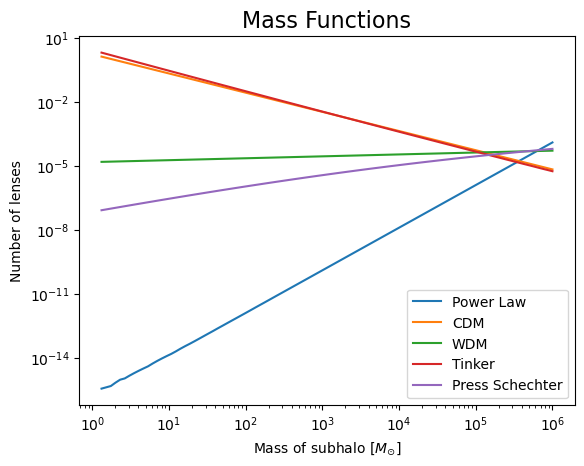

In [17]:
plt.title('Mass Functions',fontsize=(16))
plt.ylabel('Number of lenses')
plt.xlabel(r'Mass of subhalo [$M_{\odot}]$')
plt.xscale('log')
plt.yscale('log')
plt.plot(pl.m_l[2:],pl.n_l[2:],label='Power Law')
plt.plot(cdm.m_l[2:],cdm.n_l[2:],label='CDM')
plt.plot(wdm.m_l[2:],wdm.n_l[2:],label='WDM')
plt.plot(tinker.m_l[2:],tinker.n_l[2:],label='Tinker')
plt.plot(ps.m_l[2:],ps.n_l[2:],label='Press Schechter')
plt.legend()
plt.show()

In [21]:
nfw = mp.NFW(Ml=1.e5*u.Msun, c200= 13)

In [9]:
s = sm.Sampler(nstars=10, nsamples=10,nchains=8, MassFunction=cdm, MassProfile=nfw)

Creating data vector
Wrote to /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_1_2_0.dat
/Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_1_2_0.png
(10, 2)
2024-03-28T19:32:02.771454: made /Users/fangirl/Repos/Kris/dmsl/data/star_accel/Roman_hist_1_2_0.png
Loading prior
Prior loaded
Total pars: 4
Sampling..
emcee: Exception while calling your likelihood function:
  params: [ 7.39896321 -8.11002261 -5.12214758  1.75896908]
  args: []
  kwargs: {}
  exception:


Traceback (most recent call last):
  File "/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/emcee/ensemble.py", line 624, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/sampler.py", line 355, in lnlike
    alphal = self.samplealphal(pars)
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/sampler.py", line 328, in samplealphal
    alphal = lm.alphal(newmassprofile, bvec, vvec)
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/lensing_model.py", line 32, in alphal
    vec_part = alphal_vec(Ml, bvec, vvec)
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/lensing_model.py", line 98, in alphal_vec
    Term2 += (m.Mprime(b) * b)[:, np.newaxis] * Bterm
  File "/Users/fangirl/Repos/Kris/dmsl/dmsl/mass_profile.py", line 132, in Mprime
    x = ( b / self.rs ).to('').value
  File "/Users/fangirl/miniconda3/envs/project/lib/python3.8/site-packages/astropy/units/quantity.py", line 1157, in __truediv__
    return super().__truediv__(other)
  

KeyboardInterrupt: 